In [16]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [35]:
img = cv2.imread('1Figure.jpg', 0)

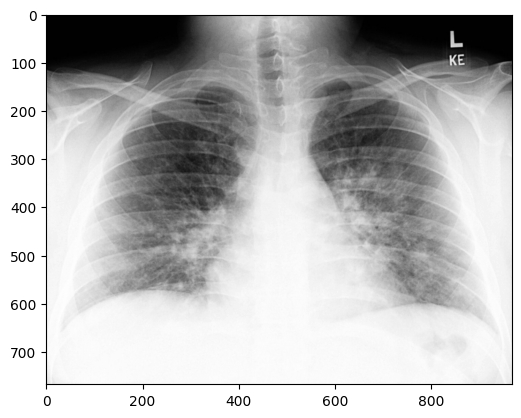

In [36]:
plt.imshow(img, cmap='gray')

In [37]:
def make_histogram(image, bins=256):

    # array with size of bins, set to zeros
    histogram = np.zeros(bins)

    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1

    # return our final result
    return histogram

In [38]:
def cumsum(values):
    result = [values[0]]
    for i in values[1:]:
        result.append(result[-1] + i)
    return result

In [39]:
def normalize(entries):

    numerator = (entries - np.min(entries)) * 255
    denorminator = np.max(entries) - np.min(entries)

    # re-normalize the cdf
    result = numerator / denorminator
    result.astype('uint8') # convert float into int

    return result

In [40]:
def equalizeHist(img):

    flatten_img = img.flatten() # convert array into 1D

    cumulativeSum = cumsum(make_histogram(flatten_img))

    cumulativeSum_norm = normalize(cumulativeSum)

    img_new_his = cumulativeSum_norm[flatten_img]

    # convert array back to original shape
    img_new = np.reshape(img_new_his, img.shape)

    return img_new, cumulativeSum_norm

In [41]:
def drawImage(orignal, result, hist):

    fig, axes = plt.subplots(2, 2, figsize=(10, 7))
    axes[0, 0].imshow(orignal, cmap='gray')
    axes[0, 0].set_title('Result before equalization')

    axes[1, 0].hist(orignal.flatten(), 256, [0,256])


    axes[0, 1].imshow(result, cmap='gray')
    axes[0, 1].set_title('Result after equalization')

    # Here you need to calculate hist of resulted image
    axes[1, 1].hist(result.ravel(),256,[0,256]);

    fig.savefig('Result.png')

In [42]:
result, normalized_cumsum = equalizeHist(img)

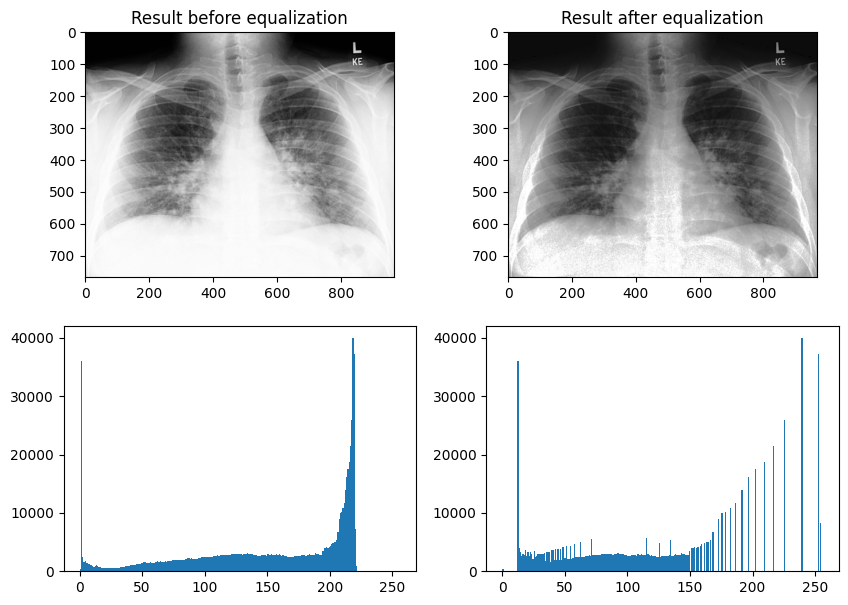

In [43]:
drawImage(img, result, normalized_cumsum)